In [299]:
## importing necessary libraries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.decomposition import PCA


# Data loading and Preparation

In [300]:
## Loading the dataset:
baseball_df = pd.read_csv("C:/Users/swati/Downloads/Data-Science-ML-Capstone-Projects-master/Data-Science-ML-Capstone-Projects-master/baseball.csv")
baseball_df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [301]:
## Columns:
baseball_df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [267]:
baseball_df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Every column is numerical type.

In [268]:
## Size of database:
baseball_df.shape

(30, 17)

Our data set is very small in size,only 30 rows and 17 columns.

In [269]:
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [270]:
## Checking missing values:
baseball_df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

there is not any null or missing values.

In [271]:
## Describing Dataset:-
baseball_df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# EDA

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>],
       [<AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>,
        <AxesSubplot:title={'center':'SO'}>],
       [<AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>],
       [<AxesSubplot:title={'center':'SV'}>,
        <AxesSubplot:title={'center':'E'}>, <AxesSubplot:>]], dtype=object)

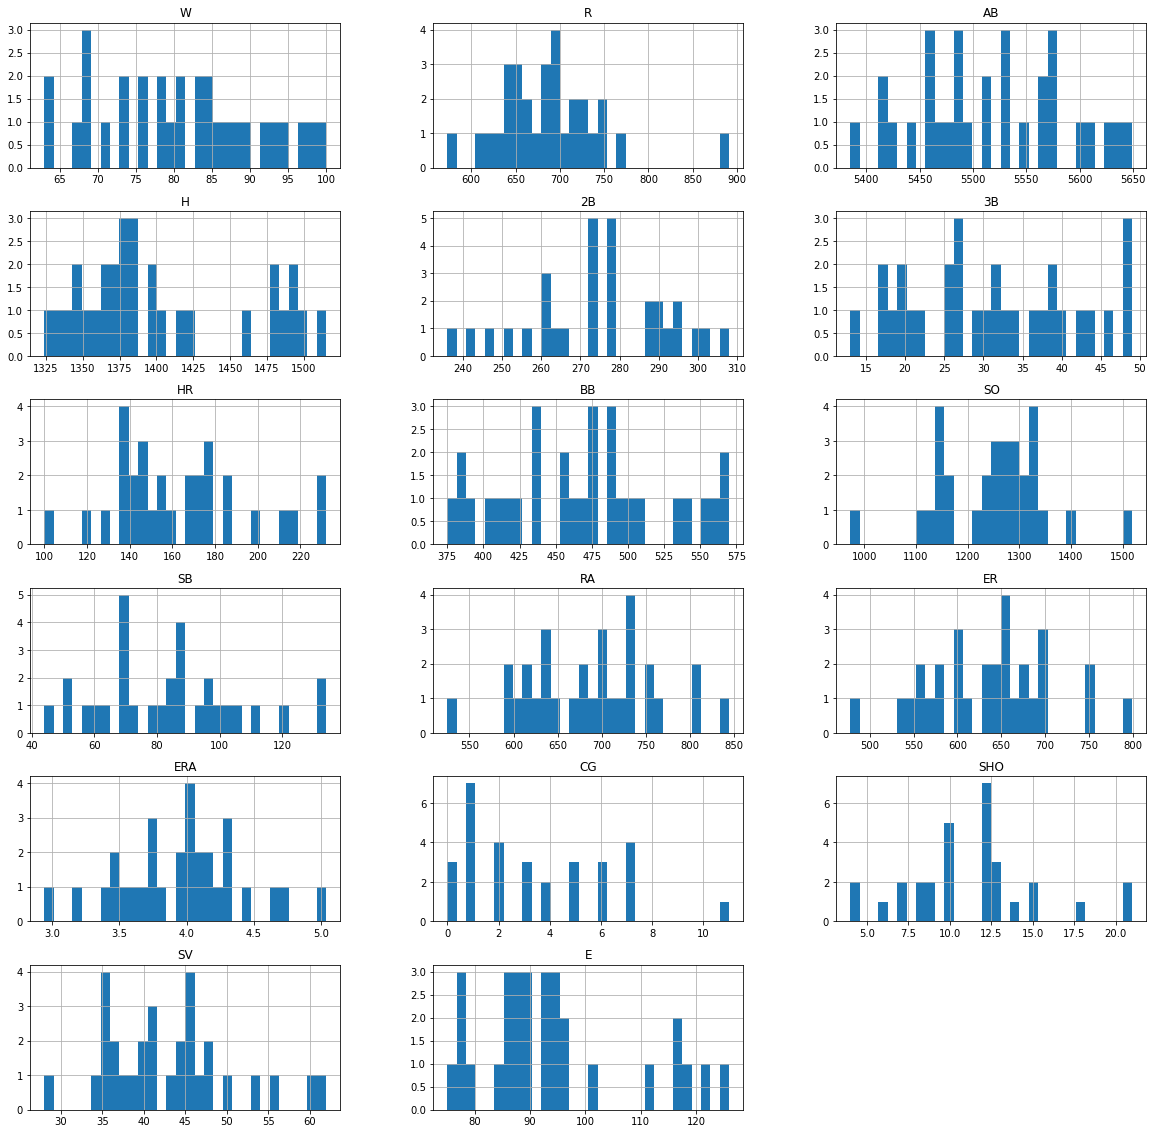

In [272]:
## Visualizing data through graphs:-
baseball_df.hist(figsize=(20,20), grid = True, layout = (6,3), bins = 30)


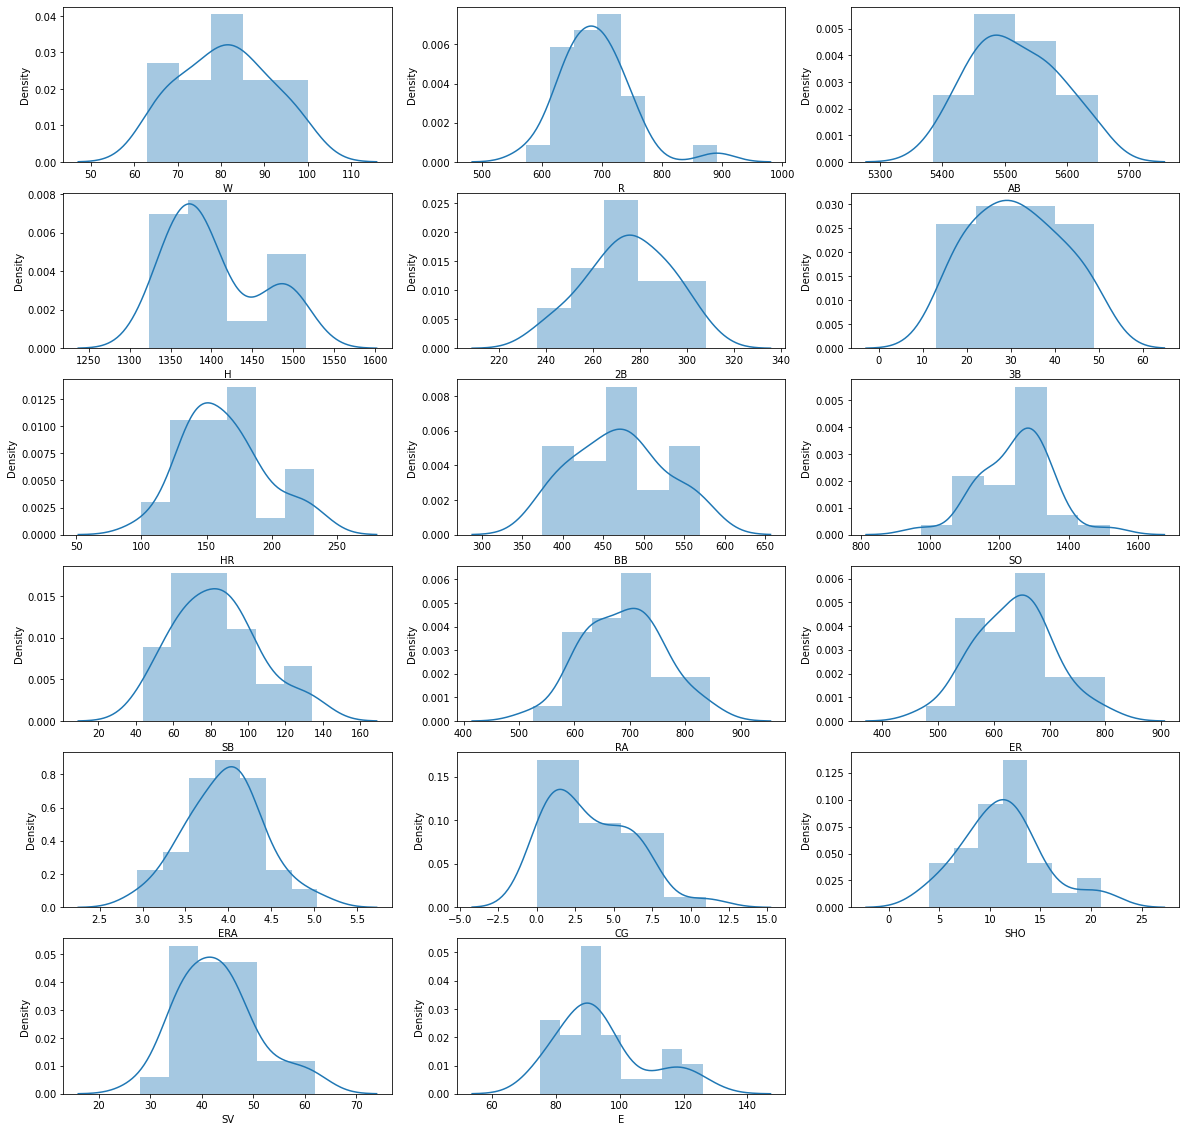

In [226]:
plt.figure(figsize=(20,20))
plotnumber =1

for i in baseball_df:
    ax = plt.subplot(6,3,plotnumber)
    sns.distplot(baseball_df[i])
    plt.xlabel(i)
    plotnumber +=1
plt.show()    

1.H,R,HR,E,CG,SHO,E are rightly skewed.
2.SO is left skewed.
3.Rest columns are normally distributed.

Looks like almost normal distribution.

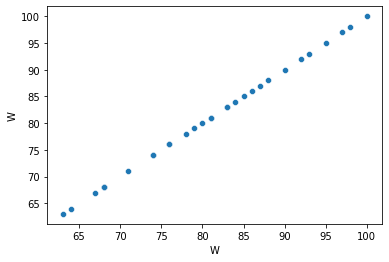

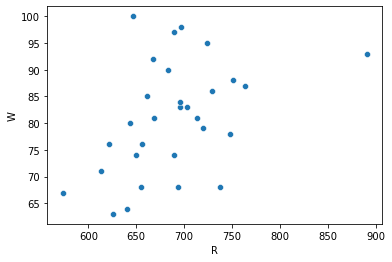

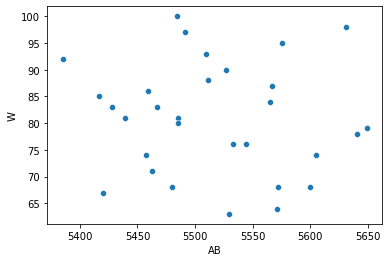

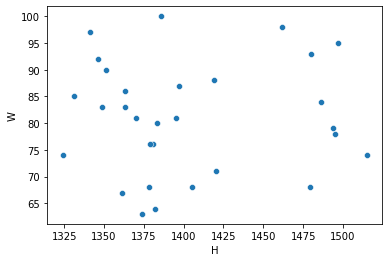

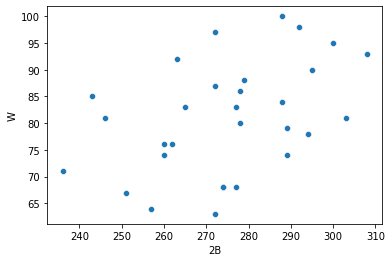

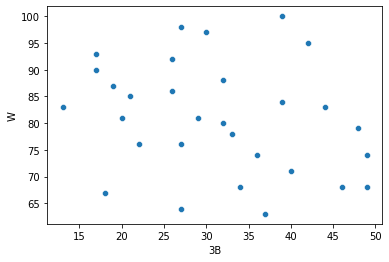

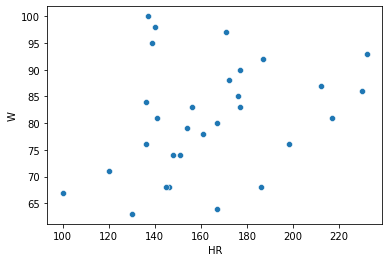

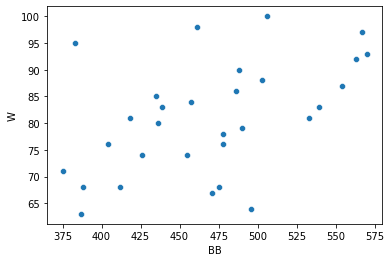

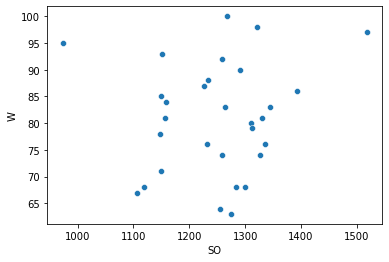

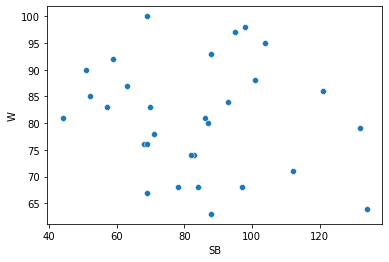

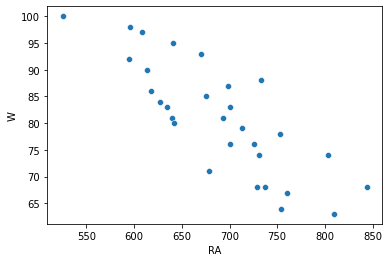

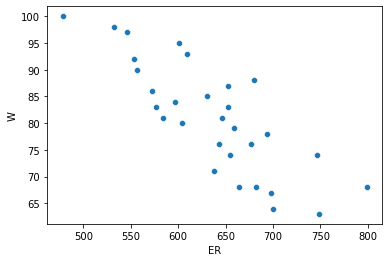

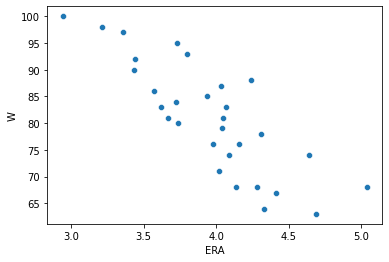

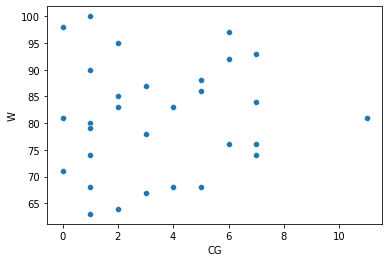

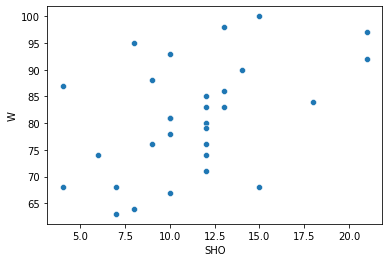

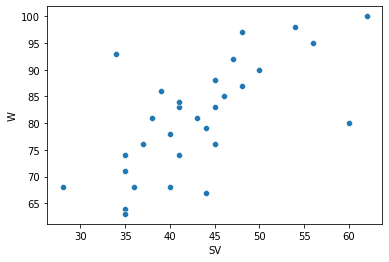

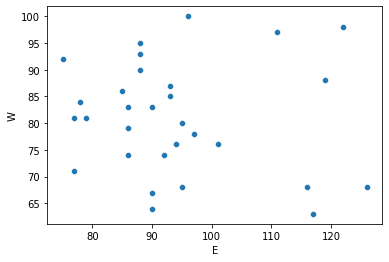

In [273]:
for i in baseball_df:
    sns.scatterplot(x=i, y=baseball_df['W'],  data=baseball_df)
    plt.show()


In [ ]:
1.There is not much relationship between W and 3B.same with W and AB,W and SB.
2.R and W have positive relationship.
3.2B and W have also some positive relationship.
4.HR and W  have also positive linear ralationship.
5.BB and W  have posititive linear relationship.
6.SO and W have posititive linear relationship
7.E and W have posititive linear relationship.
8.SV and W have posititive linear relationship.
9.W and SHO have posititive linear relationship.
9.RA and W has inverse linear relationship,same with ERA and W and ER and W.

# BiVariate Analysis

<AxesSubplot:title={'center':'Comparison between 2B and 3B'}, xlabel='2B', ylabel='3B'>

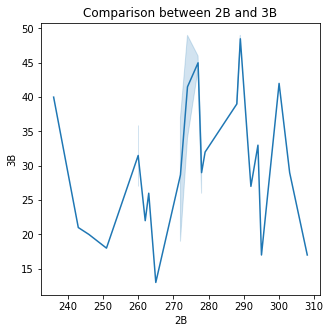

In [126]:
plt.figure(figsize=[5,5])
plt.title('Comparison between 2B and 3B')
sns.lineplot(baseball_df['2B'],baseball_df['3B'])


<AxesSubplot:title={'center':'Comparison between ER and R'}, xlabel='ER', ylabel='R'>

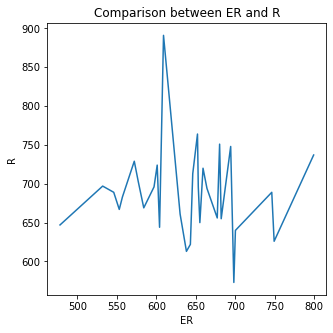

In [36]:
plt.figure(figsize=[5,5])
plt.title('Comparison between ER and R')
sns.lineplot(baseball_df['ER'],baseball_df['R'])


<AxesSubplot:title={'center':'Comparison between ER and ERA'}, xlabel='ER', ylabel='ERA'>

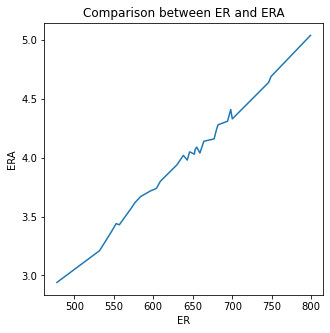

In [37]:
plt.figure(figsize=[5,5])
plt.title('Comparison between ER and ERA')
sns.lineplot(baseball_df['ER'],baseball_df['ERA'])


<AxesSubplot:title={'center':'Comparison between BB and SB'}, xlabel='BB', ylabel='SB'>

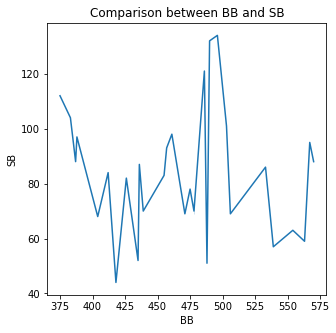

In [274]:
plt.figure(figsize=[5,5])
plt.title('Comparison between BB and SB')
sns.lineplot(baseball_df['BB'],baseball_df['SB'])


<AxesSubplot:title={'center':'Comparison between H and R'}, xlabel='H', ylabel='R'>

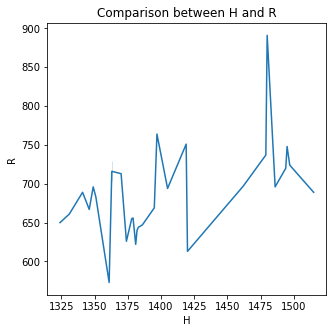

In [39]:
plt.figure(figsize=[5,5])
plt.title('Comparison between H and R')
sns.lineplot(baseball_df['H'],baseball_df['R'])


<AxesSubplot:title={'center':'Comparison between SHO and SV'}, xlabel='SHO', ylabel='SV'>

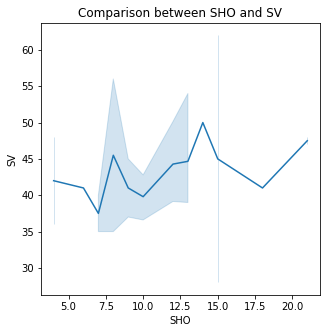

In [40]:
plt.figure(figsize=[5,5])
plt.title('Comparison between SHO and SV')
sns.lineplot(baseball_df['SHO'],baseball_df['SV'])


<AxesSubplot:title={'center':'Comparison between E and R'}, xlabel='E', ylabel='R'>

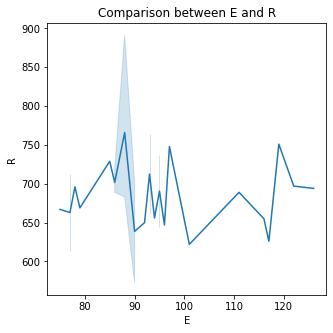

In [41]:
plt.figure(figsize=[5,5])
plt.title('Comparison between E and R')
sns.lineplot(baseball_df['E'],baseball_df['R'])


<AxesSubplot:title={'center':'Comparison between HR and SB'}, xlabel='SB', ylabel='HR'>

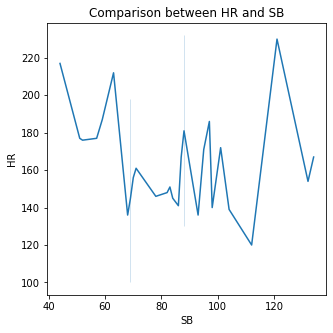

In [42]:
plt.figure(figsize=[5,5])
plt.title('Comparison between HR and SB')
sns.lineplot(baseball_df['SB'],baseball_df['HR'])


<AxesSubplot:title={'center':'Comparison between RA and ER'}, xlabel='RA', ylabel='ER'>

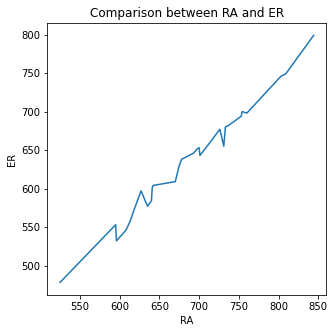

In [43]:
plt.figure(figsize=[5,5])
plt.title('Comparison between RA and ER')
sns.lineplot(baseball_df['RA'],baseball_df['ER'])


<AxesSubplot:title={'center':'Comparison between RA and ERA'}, xlabel='RA', ylabel='ERA'>

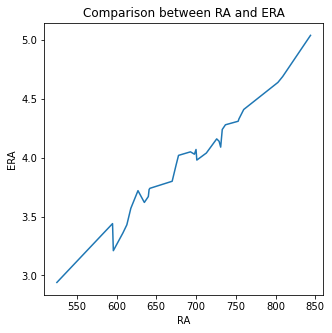

In [127]:
plt.figure(figsize=[5,5])
plt.title('Comparison between RA and ERA')
sns.lineplot(baseball_df['RA'],baseball_df['ERA'])


From this analysis RA and ERA,RA and ER and ER and ERA showing strong relation with each other.

# Multivariate Analysis

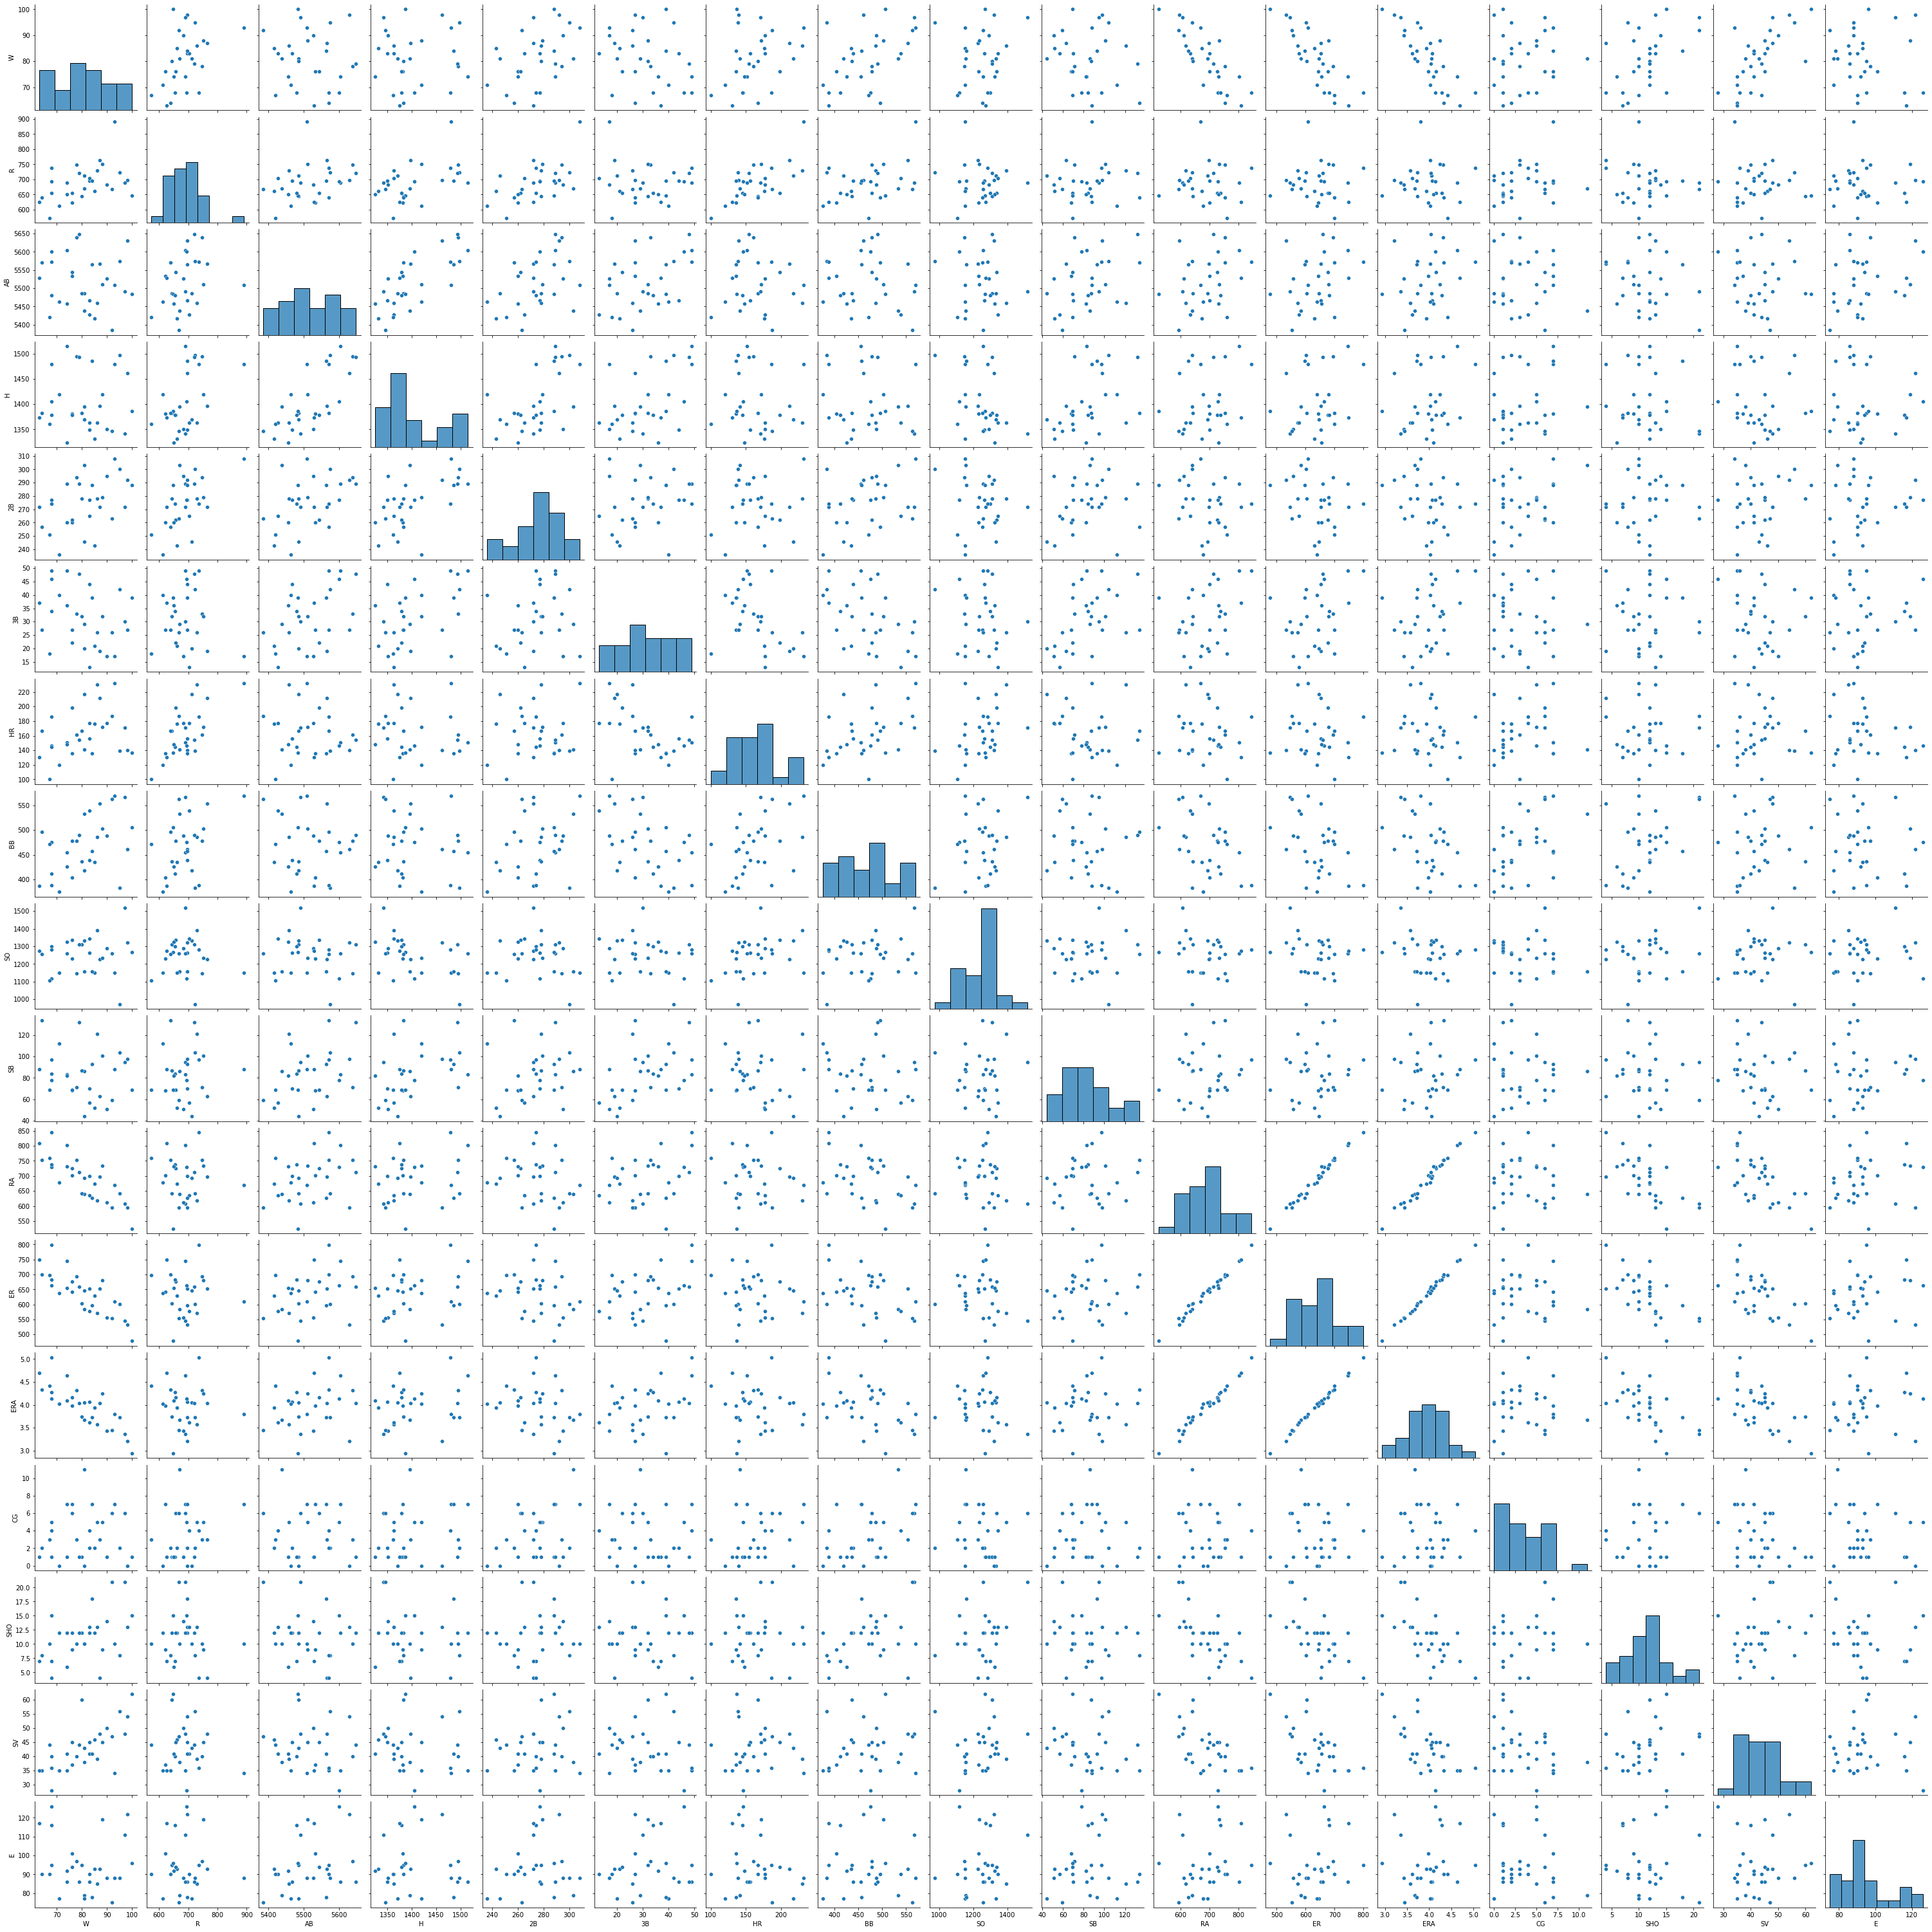

In [228]:
sns.pairplot(baseball_df)

# Correlation

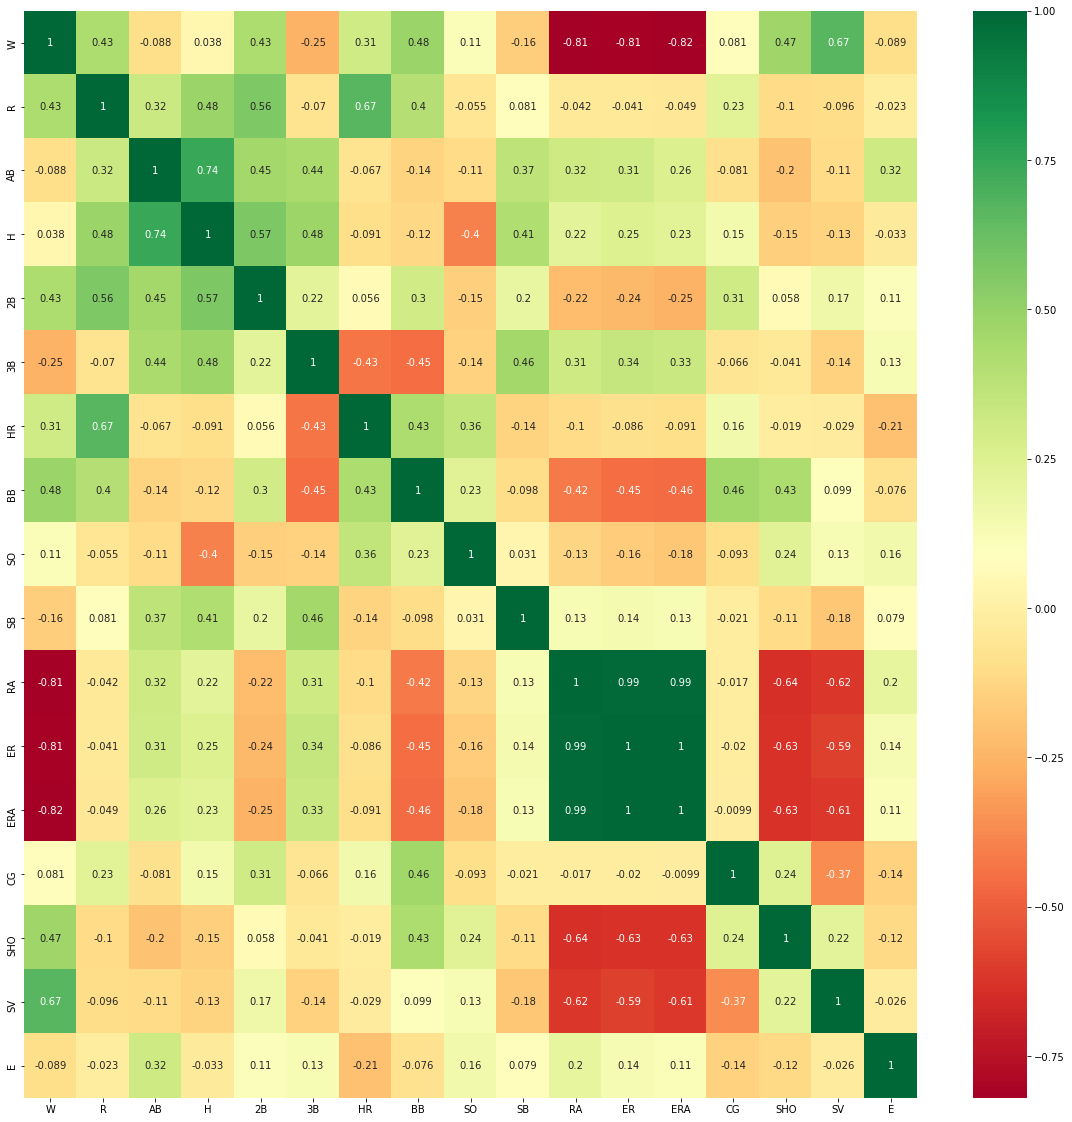

In [275]:
plt.figure(figsize = (20,20))
sns.heatmap(baseball_df.corr(),annot = True,cmap='RdYlGn')
plt.show()

From heatmap,we can see that ER,ERA and RA are strongly related with each other more than 90 percent.

1.From heatmap we can see that column CG and H are very less correlated with target column.So will drop this column.
2.SV,SHO,BB,HR,3B,2B,R are positively correlated with target variabe W.
3.E,ERA,ER,R,SB,3B,AB are negatively correlated with target variable W.
4.RA,ER,and ERA are strongly correlated with each other.


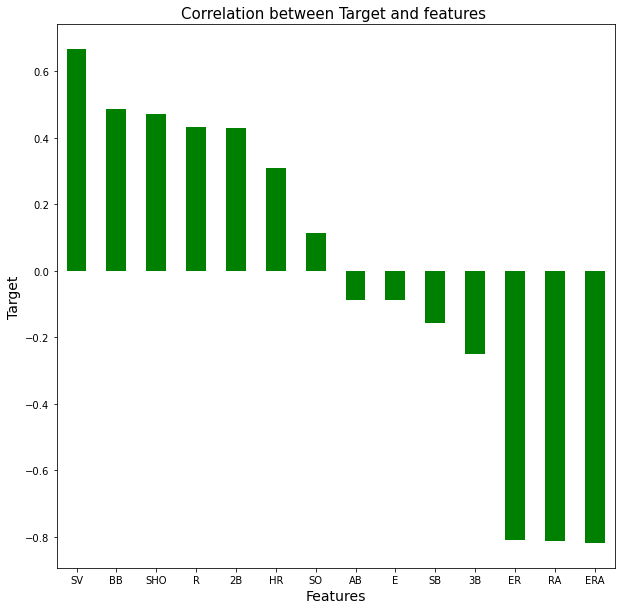

In [291]:
plt.figure(figsize=(10,10))
baseball_df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.xticks(rotation=360)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()


# Data Preprocessing

In [302]:
baseball_df.drop(columns = ['CG','H'],axis =1,inplace=True)

In [277]:
baseball_df.columns

Index(['W', 'R', 'AB', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'SHO', 'SV', 'E'],
      dtype='object')

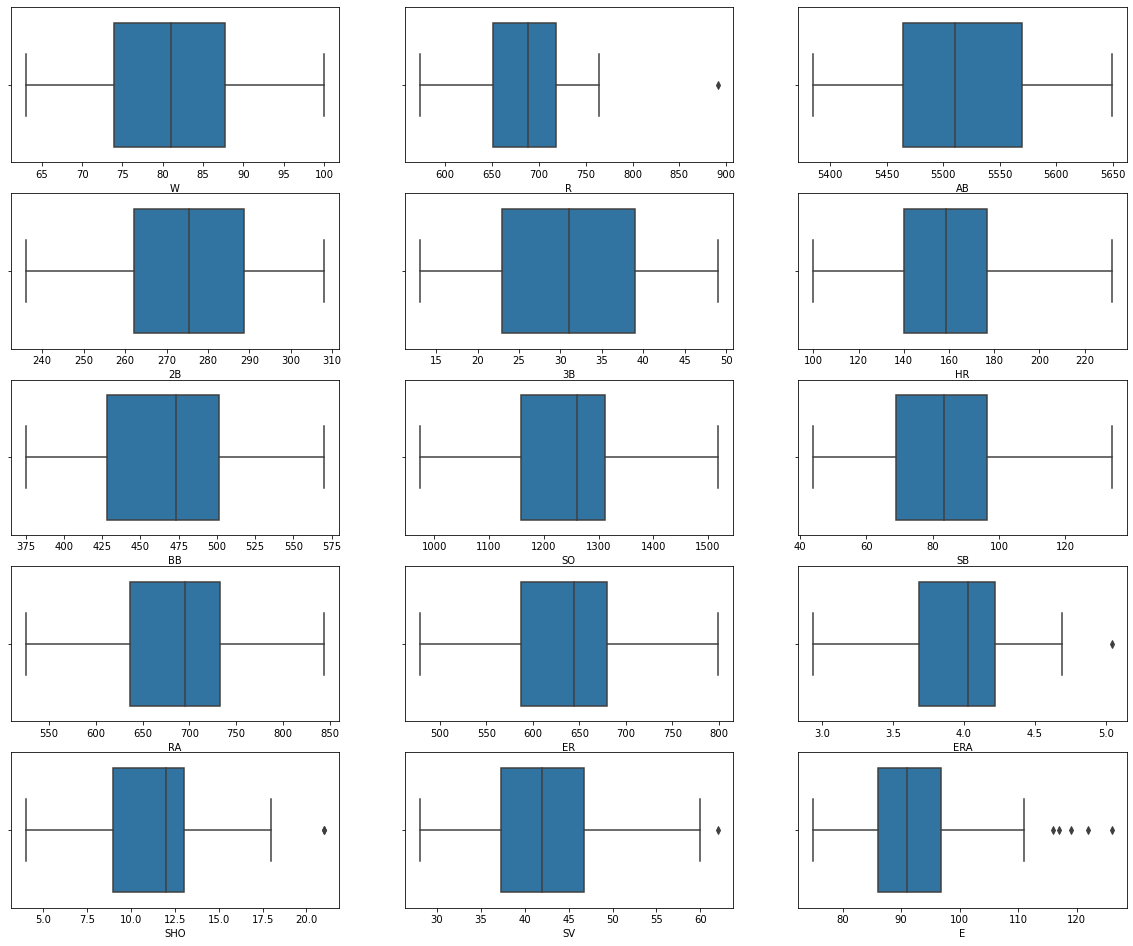

In [278]:
## Checking outliers through boxplot:
plt.figure(figsize=(20,20))
plotnumber =1

for i in baseball_df:
    ax = plt.subplot(6,3,plotnumber)
    sns.boxplot(baseball_df[i])
    plt.xlabel(i)
    plotnumber +=1
plt.show()       

We can see there are some outliers present in R,ERA,SHO,SV and E,will remove it through Zscore.

# Zscore to remove outliers

In [303]:
from scipy.stats import zscore
columns=baseball_df[['R','ERA','SHO','SV','E']]
z=np.abs(zscore(columns))

new_df = baseball_df[(z<3).all(axis=1)]
new_df.head()


,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86


In [304]:
print(baseball_df.shape)
print(new_df.shape)

(30, 15)
(29, 15)


In [281]:
## Data loss:
data_loss_per =  (30-29)/30*100
data_loss_per

3.3333333333333335

We have lost 3.33% data,that is  1 row.

In [305]:
## Checking skewness:-
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

All columns value are in +/- 0.5 range,except,SHO SV and E.

In [306]:
from sklearn.preprocessing import PowerTransformer
skewed_features = ["SHO","SV","E"]
scaler = PowerTransformer(method='yeo-johnson')


In [307]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()


,SHO,SV,E
0,-0.787002,1.532753,-0.348265
1,0.236737,0.312020,-0.540820
2,-0.252844,-0.664137,-1.326125
3,-0.513555,-0.820689,0.650818
4,0.236737,-1.149165,-0.540820


In [308]:
new_df.skew() 

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Now all columns are in range +/- 0.5 range.

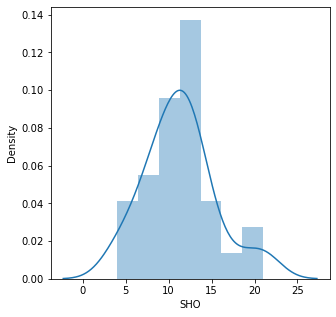

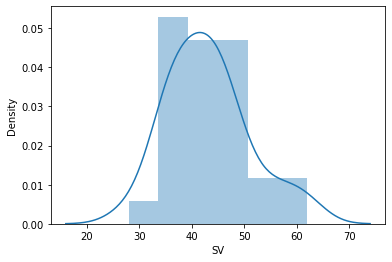

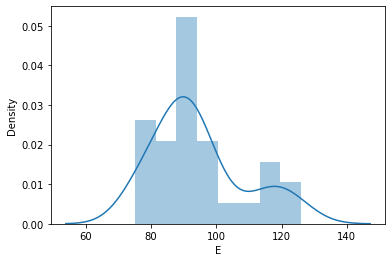

In [287]:
## Visualizing distribution of data again after removing skewness:-
columns = new_df[['SHO','SV','E']]
plt.figure(figsize=(5,5))

for i in columns:
    sns.distplot(baseball_df[i])
    plt.show()    

Data is looking almost normally distributed.

# Separating features and Target

In [309]:
x = new_df.drop('W',axis=1)
y= new_df['W']

In [310]:
x.shape

(29, 14)

In [290]:
y.shape

(29,)

# Standardization

In [311]:
scaler = StandardScaler()
x_scaler=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaler

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.513555,0.312020,1.554265


# Checking for Multicollinearity Problem using VIF:- 

In [312]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x_scaler.values,i) for i in range(len(x_scaler.columns))]
vif['Features'] = x_scaler.columns
vif


,VIF values,Features
0,6.219825,R
1,9.828077,AB
2,2.683572,2B
3,3.196853,3B
4,7.369072,HR
5,2.686472,BB
6,2.741072,SO
7,1.757901,SB
8,179.096825,RA
9,1754.643859,ER


VIF value for ER is maximum,so drop this column.

In [313]:
x_scaler.drop(columns=['ER'],axis=1,inplace=True)


In [314]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_scaler.values,i) for i in range(len(x_scaler.columns))]
vif["Features"] = x_scaler.columns
vif


,VIF values,Features
0,4.352902,R
1,3.177214,AB
2,2.597985,2B
3,3.072775,3B
4,4.949255,HR
5,2.561982,BB
6,2.661842,SO
7,1.680467,SB
8,119.939744,RA
9,111.859162,ERA


Maximum VIF value for RA,so drop this.

In [315]:
x_scaler.drop(columns=['RA'],axis=1,inplace=True)


In [316]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_scaler.values,i) for i in range(len(x_scaler.columns))]
vif["Features"] = x_scaler.columns
vif


,VIF values,Features
0,4.250076,R
1,2.238746,AB
2,2.597917,2B
3,3.030073,3B
4,4.562014,HR
5,2.222720,BB
6,2.042786,SO
7,1.568151,SB
8,3.878177,ERA
9,2.651314,SHO


In [ ]:
Now all  columns VIF values are less than 10.So we can proceed for Model Building. 

# Choosing the model:-

In [317]:
model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,random_state =r_state,test_size = 0.30)
    for i in model:
        i.fit(x_train,y_train)
        pred = i.predict(x_test)
        score = r2_score(y_test,pred)
        print("R2 score correspond to random state " ,r_state ,"is", score)
        if score> max_r2_score:
            max_r2_score=score
            final_state = r_state
            final_model = i
            
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)


R2 score correspond to random state  40 is -0.4852177029206235
R2 score correspond to random state  40 is 0.29538433972406397
R2 score correspond to random state  40 is 0.2496652830038424
R2 score correspond to random state  40 is -0.049278794946620685
R2 score correspond to random state  40 is 0.06072134094161552
R2 score correspond to random state  40 is 0.1732089768858628
R2 score correspond to random state  41 is 0.5947550717466601
R2 score correspond to random state  41 is 0.5727115289460663
R2 score correspond to random state  41 is 0.5339559623948538
R2 score correspond to random state  41 is 0.7643228076846327
R2 score correspond to random state  41 is 0.5130862140302936
R2 score correspond to random state  41 is 0.5802606630381
R2 score correspond to random state  42 is -0.07455919395465993
R2 score correspond to random state  42 is 0.6204584382871536
R2 score correspond to random state  42 is 0.18006653858016752
R2 score correspond to random state  42 is 0.8053259543557036
R2

R2 score correspond to random state  63 is -0.03918780120481924
R2 score correspond to random state  64 is 0.3058241511131099
R2 score correspond to random state  64 is 0.3756465032606249
R2 score correspond to random state  64 is 0.3996770294580615
R2 score correspond to random state  64 is 0.4589882379194331
R2 score correspond to random state  64 is 0.3543865644227563
R2 score correspond to random state  64 is 0.33567533168428143
R2 score correspond to random state  65 is 0.1546846011131725
R2 score correspond to random state  65 is 0.3535111317254175
R2 score correspond to random state  65 is 0.5085573423478852
R2 score correspond to random state  65 is 0.4821760863698108
R2 score correspond to random state  65 is 0.5416558208796286
R2 score correspond to random state  65 is 0.5513554267161411
R2 score correspond to random state  66 is -0.945900411830775
R2 score correspond to random state  66 is 0.5713290902283791
R2 score correspond to random state  66 is -0.16744664919505814
R2 

R2 score correspond to random state  85 is 0.5017155611568056
R2 score correspond to random state  86 is -2.0850155279503113
R2 score correspond to random state  86 is 0.2159937888198763
R2 score correspond to random state  86 is -0.5963946040372676
R2 score correspond to random state  86 is 0.23888393735900437
R2 score correspond to random state  86 is -0.7446533696652458
R2 score correspond to random state  86 is 0.3538345885093169
R2 score correspond to random state  87 is 0.4174630755864466
R2 score correspond to random state  87 is -0.06529973935708067
R2 score correspond to random state  87 is 0.6439122466270797
R2 score correspond to random state  87 is 0.28024793996571373
R2 score correspond to random state  87 is 0.5387622706118615
R2 score correspond to random state  87 is 0.5936439400521283
R2 score correspond to random state  88 is -0.949386985224772
R2 score correspond to random state  88 is 0.6299276956931781
R2 score correspond to random state  88 is 0.46280851227633435


max R2 score correspond to random state  50 is 0.9291790579976075 and model is LinearRegression()


# Regularization to check for Overfitting /Underfitting

# Ridge

In [318]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
params = {'alpha':[0.01,0.1,.001,.0001],'max_iter':[1000,1500,2000]}
ridge = Ridge()
clf = GridSearchCV(ridge,params)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.1, 'max_iter': 1000}


In [319]:
## Providing best parameters to Ridge regressor:-

ridge=Ridge(alpha= 0.1, max_iter= 1000)
ridge.fit(x_train,y_train)
pred=ridge.predict(x_test)
r2_score(y_test,pred)*100

59.98915199273354

# Lasso

In [321]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
params = {'alpha':[0.01,0.1,.001,.0001],'max_iter':[1000,1500,2000]}
lasso = Lasso()
clf = GridSearchCV(lasso,params)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.1, 'max_iter': 1000}


In [322]:
## Providing best parameters to Ridge regressor:-

lasso=Lasso(alpha= 0.1, max_iter= 1000)
lasso.fit(x_train,y_train)
pred=lasso.predict(x_test)
r2_score(y_test,pred)*100

70.18988589047214

# Stochastic Gradient Descent Regressor


In [320]:
from sklearn.linear_model import SGDRegressor

SGD = SGDRegressor()
SGD.fit(x_train,y_train)

pred=SGD.predict(x_test)
# R2_Score
r2_score(y_test,pred)*100

54.348114507510715

# Cross Validation of Models:-

# Analysis/Evaluation

In [81]:
from sklearn.model_selection import ShuffleSplit
n_samples = x_scaler.shape[0]
cv = ShuffleSplit(n_splits=2, test_size=0.3, random_state=50)
cvs = cross_val_score(DecisionTreeRegressor(), x_scaler, y, cv=cv)
print("Cross Validation of DecisionTree Regression model ",cvs.mean())


Cross Validation of DecisionTree Regression model  0.05732640404950401


In [323]:
from sklearn.model_selection import ShuffleSplit
n_samples = x_scaler.shape[0]
cv = ShuffleSplit(n_splits=2, test_size=0.3, random_state=50)
cvs = cross_val_score(Lasso(), x_scaler, y, cv=cv)
print("Cross Validation of Lasso Regression model ",cvs.mean())


Cross Validation of Lasso Regression model  0.8928901243723242


In [324]:
from sklearn.model_selection import ShuffleSplit
n_samples = x_scaler.shape[0]
cv = ShuffleSplit(n_splits=2, test_size=0.3, random_state=50)
cvs = cross_val_score(KNeighborsRegressor(), x_scaler, y, cv=cv)
print("Cross Validation of KNeighbors Regression model ",cvs.mean())


Cross Validation of KNeighbors Regression model  0.5922008190636691


In [326]:
from sklearn.model_selection import ShuffleSplit
n_samples = x_scaler.shape[0]
cv = ShuffleSplit(n_splits=2, test_size=0.3, random_state=50)
cvs = cross_val_score(LinearRegression(), x_scaler, y, cv=cv)
print("Cross Validation of Linear Regression model ",cvs.mean())


Cross Validation of Linear Regression model  0.7952936477818116


In [327]:
from sklearn.model_selection import ShuffleSplit
n_samples = x_scaler.shape[0]
cv = ShuffleSplit(n_splits=2, test_size=0.3, random_state=50)
cvs = cross_val_score(AdaBoostRegressor(), x_scaler, y, cv=cv)
print("Cross Validation of AdaBoostRegressor Regression model ",cvs.mean())


Cross Validation of AdaBoostRegressor Regression model  0.5401521489176174


In [328]:
from sklearn.model_selection import ShuffleSplit
n_samples = x_scaler.shape[0]
cv = ShuffleSplit(n_splits=2, test_size=0.3, random_state=50)
cvs = cross_val_score(GradientBoostingRegressor(), x_scaler, y, cv=cv)
print("Cross Validation of GradientBoostingRegressor Regression model ",cvs.mean())


Cross Validation of GradientBoostingRegressor Regression model  0.5149816002923295


In [329]:
from sklearn.model_selection import ShuffleSplit
n_samples = x_scaler.shape[0]
cv = ShuffleSplit(n_splits=2, test_size=0.3, random_state=50)
cvs = cross_val_score(RandomForestRegressor(), x_scaler, y, cv=cv)
print("Cross Validation of RandomForestRegressor Regression model ",cvs.mean())


Cross Validation of RandomForestRegressor Regression model  0.612808822142398


Cross validation score is maximum for Lasso Regression model.So will do hyperparameter tuning for Lasso Regression model.

# Hyper parameter tuning for Linear Regression

In [330]:
#Checking the best parameter for prediction of Random Forest Regressor Algo using GridSearchCV
lasso = Lasso()
parameters={'alpha':[0.01,0.1,.001,.0001],'max_iter':[1000,1500,2000],'random_state':range(1,100)}
gridsearch=GridSearchCV(lasso,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_


{'alpha': 0.1, 'max_iter': 1000, 'random_state': 1}

In [331]:
### Provinding best parameter to the model:-
lasso = Lasso(alpha = 0.1,max_iter=1000,random_state=1)
lasso.fit(x_train,y_train)
pred = lasso.predict(x_test)
score = r2_score(y_test,pred)
print("R2 Score :",score*100)


R2 Score : 70.18988589047214


We got maximum r2 score from Linear Regression,so will save model using Linear Regression.

In [332]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))


Mean Absolute Error:  4.935508138517793
Mean squared Error:  40.350381616896726
Root Mean Absolute Error:  2.2216003552659496


# Saving the Model

In [337]:
import pickle
filename ='baseball_stats.pickle'
pickle.dump(lasso,open(filename,'wb'))




# Conclusion

In [338]:
a =np.array(y_test)
predicted = np.array(lasso.predict(x_test))
df =  pd.DataFrame({ 'Original' : a,
                     'predicted' :predicted ,
                   },index = range(len(a))) 
df


,Original,predicted
0,67,75.243666
1,63,63.056959
2,97,84.723051
3,76,74.810406
4,83,85.341158
5,92,90.192728
6,86,78.654523
7,98,89.412909
8,81,83.571407
